https://github.com/hpparvi/parviainen_2019b_toi_263/blob/master/6a_analysis.ipynb

In [91]:
from uncertainties import ufloat

zero_epoch = ufloat(2459893.78503, 0.00038)
period = ufloat(0.9291220, 0.0000093)
tdur = ufloat(0.04347, 0.00268)

star_r = ufloat(0.485926, 0.0165041)
star_m = ufloat(0.483975, 0.0218418)

In [57]:
import pandas as pd
import xarray as xa
import seaborn as sb
from astropy.io import fits as pf
from astropy.stats import sigma_clip
from astropy.table import Table
from astropy.units import Rjup, Rsun, m, AU
from numpy import zeros, diff, concatenate, sqrt, degrees, radians, array

from pytransit.orbits import as_from_rhop, i_from_ba, d_from_pkaiews, epoch
from pytransit.utils.eclipses import Teq
from numpy.random.mtrand import normal, uniform

def read_mcmc(fname, flatten=True):
    with xa.open_dataset(fname) as ds:
        if flatten:
            with xa.open_dataset(fname) as ds:
                npt = ds.mcmc.shape[-1]
                df = pd.DataFrame(array(ds.mcmc).reshape([-1, npt]), columns=ds.lm_parameter.values)
            return df
        else:
            return array(ds.mcmc)

In [113]:
df1 = read_mcmc('./results/toi05956.01_230418_chromatic_k.nc')
df1.columns

Index(['tc', 'p', 'rho', 'b', 'k2_r', 'k2_i', 'k2_z_s', 'q1_r', 'q2_r', 'q1_i',
       'q2_i', 'q1_z_s', 'q2_z_s', 'wn_loge_0', 'wn_loge_1', 'wn_loge_2',
       'lm_i__0', 'lm_s__0_1', 'lm_s__0_2', 'lm_s__0_3', 'lm_s__0_4',
       'lm_i__0', 'lm_s__0_1', 'lm_s__0_2', 'lm_s__0_3', 'lm_s__0_4',
       'lm_i__0', 'lm_s__0_1', 'lm_s__0_2', 'lm_s__0_3', 'lm_s__0_4'],
      dtype='object')

In [115]:
df2 = read_mcmc('./results/toi05956.01_230430_chromatic_k.nc')
df2.columns

Index(['tc', 'p', 'rho', 'b', 'k2_r', 'k2_i', 'k2_z_s', 'q1_r', 'q2_r', 'q1_i',
       'q2_i', 'q1_z_s', 'q2_z_s', 'wn_loge_0', 'wn_loge_1', 'wn_loge_2',
       'lm_i__0', 'lm_s__0_1', 'lm_s__0_2', 'lm_s__0_3', 'lm_s__0_4',
       'lm_i__0', 'lm_s__0_1', 'lm_s__0_2', 'lm_s__0_3', 'lm_s__0_4',
       'lm_i__0', 'lm_s__0_1', 'lm_s__0_2', 'lm_s__0_3', 'lm_s__0_4'],
      dtype='object')

In [95]:
import numpy as np

p1 = np.percentile(df1['p'], [16,50,84])
tc1 = np.percentile(df1['tc'], [16,50,84])
p2 = np.percentile(df2['p'], [16,50,84])
tc2 = np.percentile(df2['tc'], [16,50,84])

In [99]:
tc1 = np.median(df1['tc'])
tc2 = np.median(df2['tc'])

n = (tc1-zero_epoch.n)/period.n
n

171.9980990315518

In [100]:
n = (tc2-zero_epoch.n)/period.n
n

184.9990350552536

In [100]:
n = (tc2-zero_epoch.n)/period.n
n

184.9990350552536

In [101]:
tc3 = 2460153.9370948398

In [109]:
n = (tc2-tc1)/period.n
n

13.000936023701804

In [110]:
n = (tc3-tc2)/period.n
n

94.99870995545939

In [123]:
bands = 'r i z_s'.split()
for b in bands:
    df1['k_'+b] = np.sqrt(df1['k2_'+b])
    df2['k_'+b] = np.sqrt(df2['k2_'+b])

Text(0.5, 1.03, 'TOI-5956.01 odd & even transits with MuSCAT2 \n 230418 (blue) & 230430 (red)')

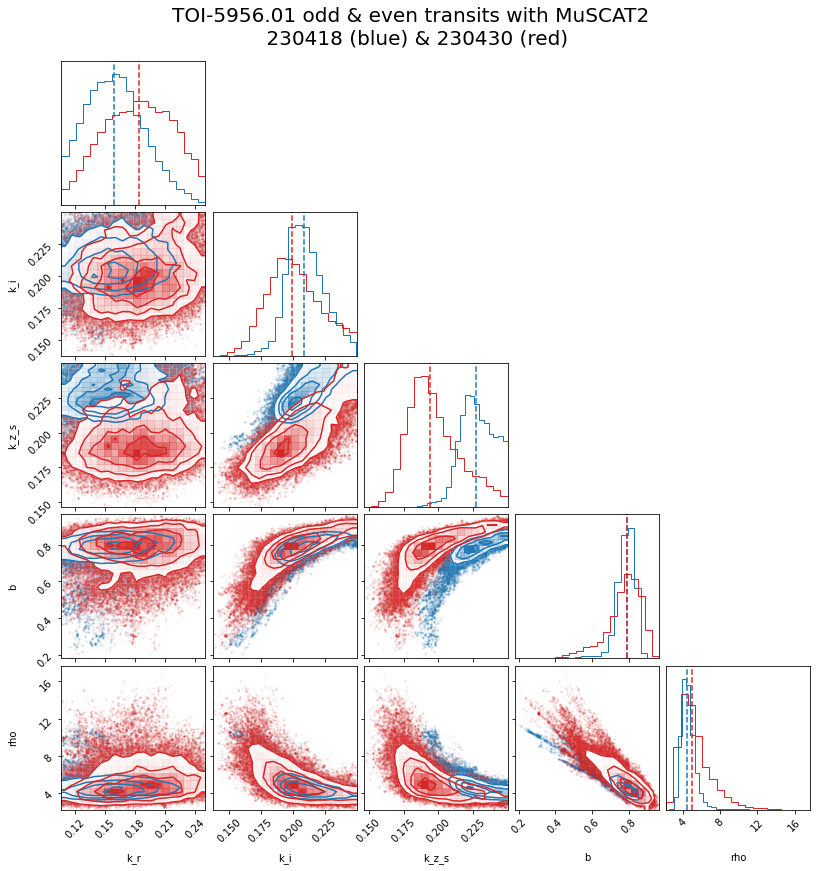

In [146]:
cols = ['k_r', 'k_i', 'k_z_s', 'b', 'rho']

d1 = df1[cols]
d2 = df2[cols]
fig = corner(d1, color="C0", 
             quantiles=[0.50], 
#              quantiles=[0.16, 0.50, 0.84], 
             weights=np.ones(len(d1))/len(d1));
fig2 = corner(d2, color="C3",
              labels=cols,
               #quantiles=[0.16, 0.5, 0.84],
#                show_titles=True, 
#                title_kwargs={"fontsize": 16},
               #title_fmt='.4f',
              quantiles=[0.50],
#               quantiles=[0.16, 0.50, 0.84],
              fig=fig, weights=np.ones(len(d2))/len(d2))
fig.suptitle("TOI-5956.01 odd & even transits with MuSCAT2 \n 230418 (blue) & 230430 (red)", fontsize=20, y=1.03)

Text(0.5, 1.03, 'TOI-5956.01 | MuSCAT2 \n 230418 (blue) & 230430 (red)')

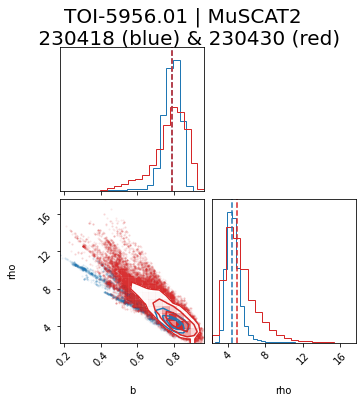

In [144]:
cols = ['b', 'rho']

d1 = df1[cols]
d2 = df2[cols]
fig = corner(d1, color="C0", 
             quantiles=[0.50], 
             weights=np.ones(len(d1))/len(d1));
fig2 = corner(d2, color="C3",
              labels=cols,
              quantiles=[0.50],
              fig=fig, weights=np.ones(len(d2))/len(d2))
fig.suptitle("TOI-5956.01 | MuSCAT2 \n 230418 (blue) & 230430 (red)", fontsize=20, y=1.03)

In [145]:
fig.axes

[<AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:xlabel='b', ylabel='rho'>,
 <AxesSubplot:xlabel='rho'>]